<a href="https://colab.research.google.com/github/kartik703/Cycle-gan-/blob/main/Cycle_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Define dataset folder in Google Drive
dataset_dir = "/content/drive/MyDrive/CycleGAN_Dataset"

# Define subfolders
folders = ["trainA", "testA", "trainB", "testB"]
for folder in folders:
    os.makedirs(os.path.join(dataset_dir, folder), exist_ok=True)

print(f"✅ Created dataset structure in {dataset_dir}")


✅ Created dataset structure in /content/drive/MyDrive/CycleGAN_Dataset


In [ ]:
import zipfile
import shutil
import glob

# Define ZIP file paths in Google Drive
zip_files = {
    "humans": [
        "/content/drive/MyDrive/face_img/face_align_celeba.zip",
        "/content/drive/MyDrive/face_img/UTK Face Cropped.zip"
    ],
    "animals": [
        "/content/drive/MyDrive/cat_and_dog-1/cat_face.zip",
        "/content/drive/MyDrive/cat_and_dog-1/dog faces.zip"
    ]
}

# Extract ZIP files into temporary location
extract_path = "/content/temp_extracted"
os.makedirs(extract_path, exist_ok=True)

for category, files in zip_files.items():
    for zip_path in files:
        if os.path.exists(zip_path):
            try:
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_path)
                print(f"✅ Extracted: {zip_path}")
            except zipfile.BadZipFile:
                print(f"❌ Corrupt zip file: {zip_path}")
        else:
            print(f"⚠️ File not found: {zip_path}")


✅ Extracted: /content/drive/MyDrive/face_img/face_align_celeba.zip
✅ Extracted: /content/drive/MyDrive/face_img/UTK Face Cropped.zip
✅ Extracted: /content/drive/MyDrive/cat_and_dog-1/cat_face.zip
✅ Extracted: /content/drive/MyDrive/cat_and_dog-1/dog faces.zip


In [ ]:
import random

# Paths to final dataset folders
trainA_dir = os.path.join(dataset_dir, "trainA")
trainB_dir = os.path.join(dataset_dir, "trainB")

# Define source folders inside extracted data
source_human_folders = [os.path.join(extract_path, "img_align_celeba"), os.path.join(extract_path, "utkcropped")]
source_animal_folders = [os.path.join(extract_path, "train"),  # Dog dataset
                         os.path.join(extract_path, "Cat-faces-dataset-master/dataset-part1"),
                         os.path.join(extract_path, "Cat-faces-dataset-master/dataset-part2"),
                         os.path.join(extract_path, "Cat-faces-dataset-master/dataset-part3")]

# Move function with renaming
def move_images(src_folders, dest_folder, prefix, max_files=5000):
    total_moved = 0
    os.makedirs(dest_folder, exist_ok=True)

    for src_folder in src_folders:
        if os.path.exists(src_folder):
            images = glob.glob(os.path.join(src_folder, "**", "*.*"), recursive=True)[:max_files]
            random.shuffle(images)  # Shuffle for randomness
            for idx, img_path in enumerate(images):
                if img_path.lower().endswith((".jpg", ".png", ".jpeg")):
                    new_filename = f"{prefix}_{idx:05d}" + os.path.splitext(img_path)[-1]
                    dest_path = os.path.join(dest_folder, new_filename)
                    shutil.copy(img_path, dest_path)  # Copy instead of move
            total_moved += len(images)
            print(f"✅ Moved {len(images)} images from {src_folder} to {dest_folder}")
    print(f"🎯 Total images moved to {dest_folder}: {total_moved}")

# Move humans to trainA
move_images(source_human_folders, trainA_dir, prefix="human", max_files=70000)

# Move animals to trainB (Dogs & Cats)
move_images(source_animal_folders, trainB_dir, prefix="animal", max_files=70000)


KeyboardInterrupt: 

In [ ]:
import shutil

# Define test folders
testA_dir = os.path.join(dataset_dir, "testA")
testB_dir = os.path.join(dataset_dir, "testB")
os.makedirs(testA_dir, exist_ok=True)
os.makedirs(testB_dir, exist_ok=True)

# Get image lists
trainA_images = glob.glob(os.path.join(trainA_dir, "*.*"))
trainB_images = glob.glob(os.path.join(trainB_dir, "*.*"))

# Shuffle before splitting
random.shuffle(trainA_images)
random.shuffle(trainB_images)

# Define split (70% Train, 30% Test)
split_ratio = 0.3
testA_count = int(len(trainA_images) * split_ratio)
testB_count = int(len(trainB_images) * split_ratio)

# Move images to test sets
for img in trainA_images[:testA_count]:
    shutil.move(img, testA_dir)

for img in trainB_images[:testB_count]:
    shutil.move(img, testB_dir)

# Final dataset count
print(f"📊 **Dataset Distribution:**")
print(f"👨‍🦰 TrainA (Humans): {len(glob.glob(os.path.join(trainA_dir, '*.*')))} images")
print(f"👨‍🦰 TestA (Humans): {len(glob.glob(os.path.join(testA_dir, '*.*')))} images")
print(f"🐶🐱 TrainB (Animals): {len(glob.glob(os.path.join(trainB_dir, '*.*')))} images")
print(f"🐶🐱 TestB (Animals): {len(glob.glob(os.path.join(testB_dir, '*.*')))} images")
print("✅ **Dataset is now correctly split!** 🚀")


NameError: name 'trainA_dir' is not defined

In [ ]:
!head -n 50 /content/pytorch-CycleGAN-and-pix2pix/train.py


In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 4 \
  --n_epochs 80 \
  --n_epochs_decay 100 \
  --lr 0.0001 \
  --lambda_A 10 --lambda_B 10 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --epoch_count 1 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097


----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/dataset              	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    e

In [ ]:
import matplotlib.pyplot as plt
import json

log_path = "/content/drive/MyDrive/CycleGAN_checkpoints/human2animal/loss_log.txt"

with open(log_path, "r") as f:
    lines = f.readlines()

epochs = []
G_A_losses, G_B_losses, cycle_A_losses, cycle_B_losses = [], [], [], []

for line in lines:
    if "epoch" in line:
        parts = line.strip().split()
        epochs.append(int(parts[1].replace(",", "")))
        G_A_losses.append(float(parts[4].replace(",", "")))
        G_B_losses.append(float(parts[7].replace(",", "")))
        cycle_A_losses.append(float(parts[10].replace(",", "")))
        cycle_B_losses.append(float(parts[13]))

plt.figure(figsize=(10, 5))
plt.plot(epochs, G_A_losses, label="G_A Loss")
plt.plot(epochs, G_B_losses, label="G_B Loss")
plt.plot(epochs, cycle_A_losses, label="Cycle_A Loss")
plt.plot(epochs, cycle_B_losses, label="Cycle_B Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("CycleGAN Training Loss Curve")
plt.show()


In [ ]:
!python test.py --dataroot "/content/dataset" \
                --name "human2animal" \
                --model "cycle_gan" \
                --direction "AtoB" \
                --gpu_ids 0 \
                --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
                --epoch best


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/dataset              	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: best                          	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]


In [ ]:
!ls -lh ./results/human2animal/test_best/images/


total 25M
-rw-r--r-- 1 root root  96K Feb 15 23:20 human_00001_fake_A.png
-rw-r--r-- 1 root root  88K Feb 15 23:20 human_00001_fake_B.png
-rw-r--r-- 1 root root  38K Feb 15 23:20 human_00001_real_A.png
-rw-r--r-- 1 root root  67K Feb 15 23:20 human_00001_real_B.png
-rw-r--r-- 1 root root  86K Feb 15 23:20 human_00001_rec_A.png
-rw-r--r-- 1 root root  84K Feb 15 23:20 human_00001_rec_B.png
-rw-r--r-- 1 root root  81K Feb 15 23:20 human_00002_fake_A.png
-rw-r--r-- 1 root root  85K Feb 15 23:20 human_00002_fake_B.png
-rw-r--r-- 1 root root  51K Feb 15 23:20 human_00002_real_A.png
-rw-r--r-- 1 root root  46K Feb 15 23:20 human_00002_real_B.png
-rw-r--r-- 1 root root  76K Feb 15 23:20 human_00002_rec_A.png
-rw-r--r-- 1 root root  79K Feb 15 23:20 human_00002_rec_B.png
-rw-r--r-- 1 root root  99K Feb 15 23:20 human_00004_fake_A.png
-rw-r--r-- 1 root root  95K Feb 15 23:20 human_00004_fake_B.png
-rw-r--r-- 1 root root  66K Feb 15 23:20 human_00004_real_A.png
-rw-r--r-- 1 root root  82K Feb 15

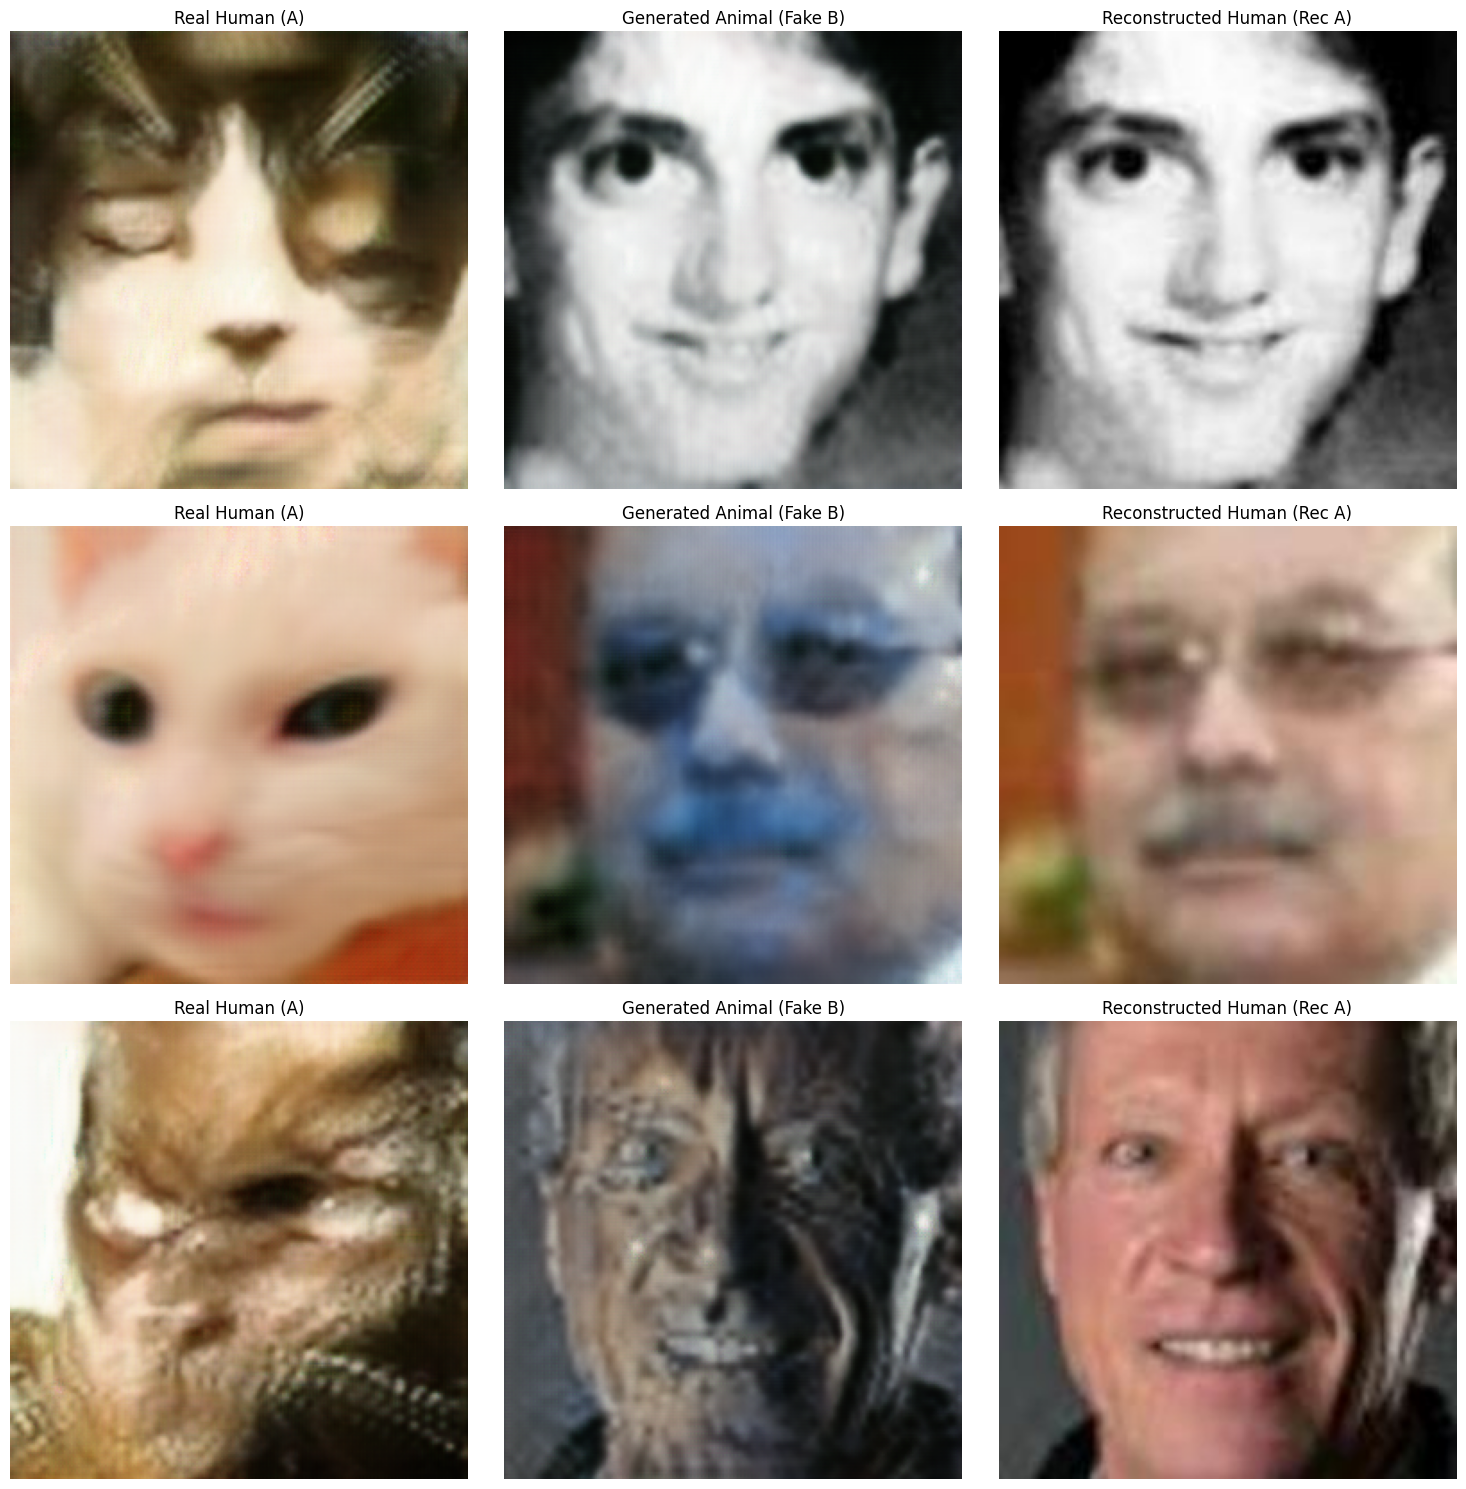

In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob

# Get a list of generated images
generated_images = sorted(glob.glob("./results/human2animal/test_best/images/*.png"))

# Show a few translated results
num_samples = 3  # Adjust to view more images
fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))

for i in range(num_samples):
    real_A = cv2.imread(generated_images[i * 6])  # Real Human
    fake_B = cv2.imread(generated_images[i * 6 + 1])  # Generated Animal
    rec_A = cv2.imread(generated_images[i * 6 + 2])  # Reconstructed Human

    real_A = cv2.cvtColor(real_A, cv2.COLOR_BGR2RGB)
    fake_B = cv2.cvtColor(fake_B, cv2.COLOR_BGR2RGB)
    rec_A = cv2.cvtColor(rec_A, cv2.COLOR_BGR2RGB)

    axes[i, 0].imshow(real_A)
    axes[i, 0].set_title("Real Human (A)")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(fake_B)
    axes[i, 1].set_title("Generated Animal (Fake B)")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(rec_A)
    axes[i, 2].set_title("Reconstructed Human (Rec A)")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 4 \
  --n_epochs 50 \
  --n_epochs_decay 15 \
  --lr 0.0002 \
  --beta1 0.5 \
  --lambda_A 10 \
  --lambda_B 10 \
  --lambda_identity 0.5 \
  --pool_size 50 \
  --gan_mode "lsgan" \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --continue_train \
  --epoch_count 18 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097 \
  --num_threads 4 \
  --load_size 286 \
  --crop_size 256 \
  --norm "instance" \
  --save_by_iter \
  --update_html_freq 1000 \
  --print_freq 100


----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/dataset              	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
    

In [ ]:
!python train.py \
  --dataroot="/content/dataset" \
  --name="human2animal" \
  --model="cycle_gan" \
  --direction="AtoB" \
  --batch_size=4 \
  --n_epochs=60 \
  --n_epochs_decay=20 \
  --lr=0.0001 \
  --lambda_A=5 \
  --lambda_B=5 \
  --save_epoch_freq=5 \
  --save_latest_freq=5000 \
  --gpu_ids=0 \
  --continue_train \
  --epoch_count=37 \
  --checkpoints_dir="/content/drive/MyDrive/CycleGAN_checkpoints"


python3: can't open file '/content/train.py': [Errno 2] No such file or directory


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix


Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 25.60 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!ls


CycleGAN.ipynb	docs		 LICENSE  pix2pix.ipynb     scripts   util
data		environment.yml  models   README.md	    test.py
datasets	imgs		 options  requirements.txt  train.py


In [ ]:
!python train.py \
  --dataroot="/content/dataset" \
  --name="human2animal" \
  --model="cycle_gan" \
  --direction="AtoB" \
  --batch_size=4 \
  --n_epochs=60 \
  --n_epochs_decay=20 \
  --lr=0.0001 \
  --lambda_A=5 \
  --lambda_B=5 \
  --save_epoch_freq=5 \
  --save_latest_freq=5000 \
  --gpu_ids=0 \
  --continue_train \
  --epoch_count=37 \
  --checkpoints_dir="/content/drive/MyDrive/CycleGAN_checkpoints"

In [ ]:
!pip install dominate


In [ ]:
!python test.py \
  --dataroot "/content/dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "./results/human2animal" \
  --num_test 50


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/dataset              	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --gpu_ids 0 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results" \
  --num_test 50


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 4 \
  --n_epochs 50 \
  --n_epochs_decay 50 \
  --lr 0.0001 \
  --lambda_A 5 \
  --lambda_B 5 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --continue_train \
  --epoch_count 41 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097


----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                       

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --gpu_ids 0 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results" \
  --num_test 50


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

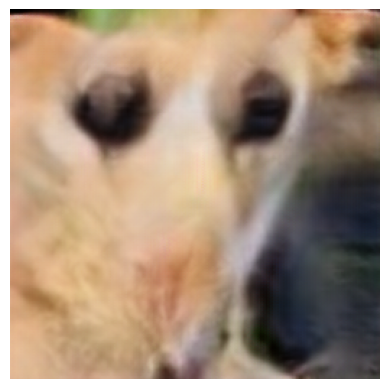

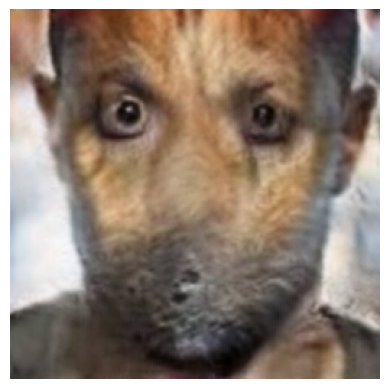

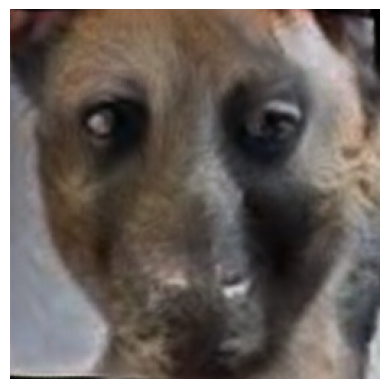

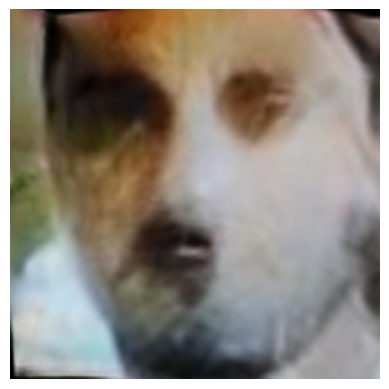

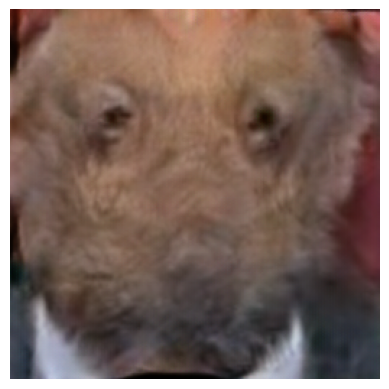

In [ ]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

test_results = sorted(glob.glob("/content/drive/MyDrive/CycleGAN_results/human2animal/test_latest/images/*fake_B.png"))

for img_path in test_results[:5]:  # Show first 5 results
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()


In [ ]:
for img_path in corrupt_images:
    os.remove(img_path)
    print(f"🗑️ Deleted: {img_path}")


🗑️ Deleted: /content/drive/MyDrive/CycleGAN_Dataset/trainA/human_02487.jpg


In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 4 \
  --n_epochs 100 \
  --n_epochs_decay 100 \
  --lr 0.0001 \
  --lambda_A 10 \
  --lambda_B 10 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --continue_train \
  --epoch_count 51 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints"


----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                       

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 4 \
  --n_epochs 100 \
  --n_epochs_decay 100 \
  --lr 0.0001 \
  --lambda_A 3 \
  --lambda_B 3 \
  --lambda_identity 0.8 \
  --save_epoch_freq 5 \
  --save_latest_freq 5000 \
  --gpu_ids 0 \
  --continue_train \
  --epoch_count 69 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --display_id 1 \
  --display_port 8097


Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/pytorch-CycleGAN-and-pix2pix/util/util.py", line 3, in <module>
    import torch
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 2486, in <module>
    from torch import _meta_registrations
  File "/usr/local/lib/python3.11/dist-packages/torch/_meta_registrations.py", line 10, in <module>
    from torch._decomp import (
  File "/usr/local/lib/python3.11/dist-packages/torch/_decomp/__init__.py", line 249, in <module>
    import torch._decomp.decompositions
  File "/usr/local/lib/python3.11/dist-packages/torch/_decomp/decompositions.py", line 15, in <module>
    import torch._prims as prims
  File "/usr/local/lib/python

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results" \
  --gpu_ids 0 \
  --num_test 50


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

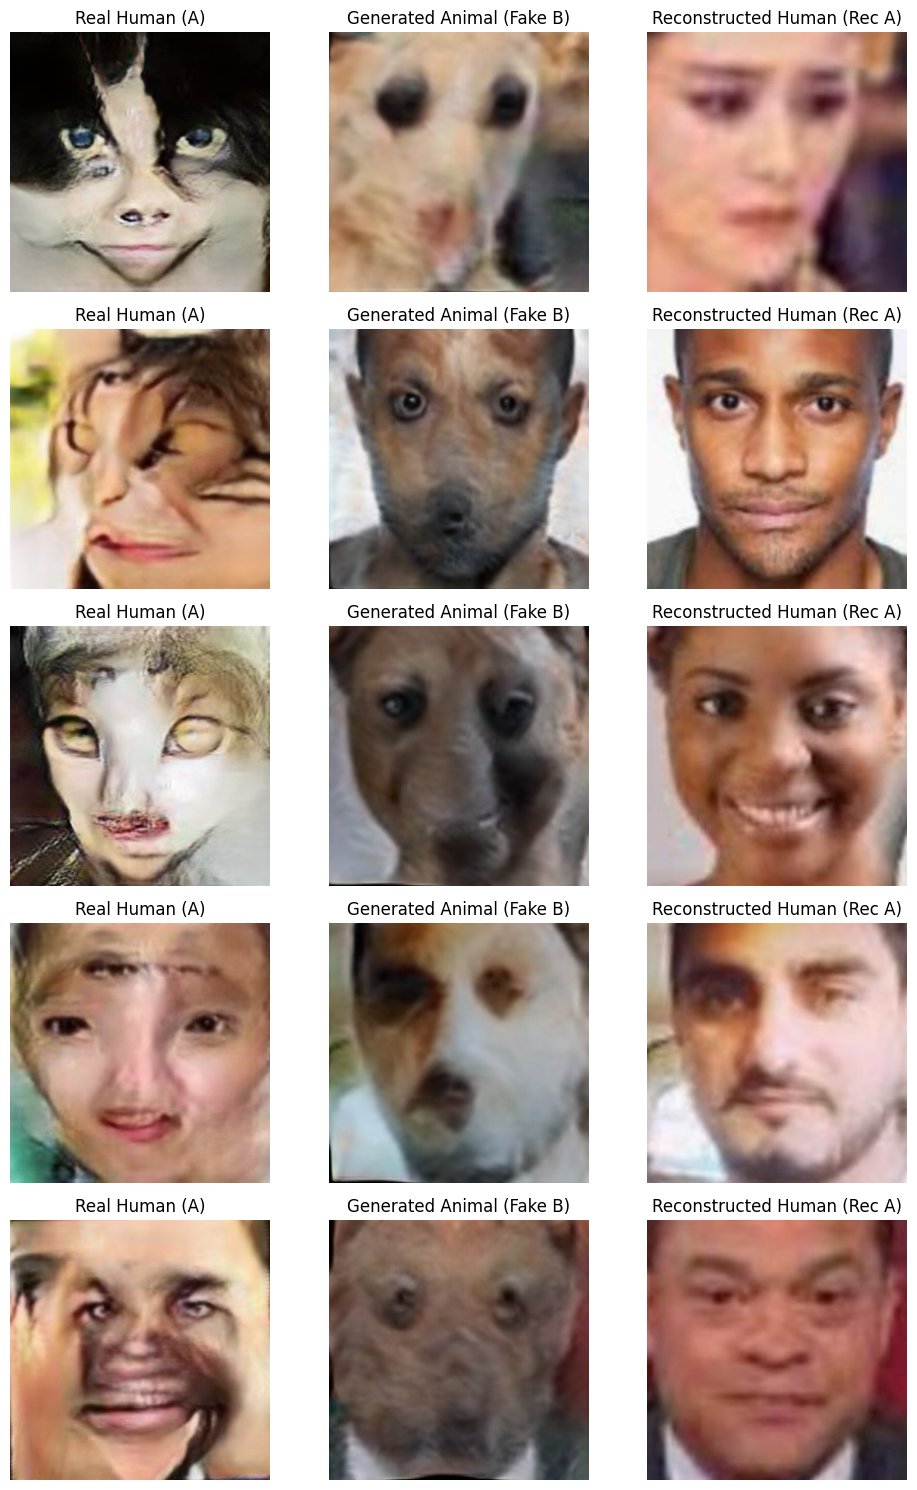

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the result directory
result_dir = "/content/drive/MyDrive/CycleGAN_results/human2animal/test_latest/images"

# Get image files
image_files = sorted(os.listdir(result_dir))

# Show first 5 images
fig, axes = plt.subplots(5, 3, figsize=(10, 15))
for i in range(5):
    real_A = Image.open(os.path.join(result_dir, image_files[i*6]))  # Real Human (A)
    fake_B = Image.open(os.path.join(result_dir, image_files[i*6+1]))  # Generated Animal (Fake B)
    rec_A = Image.open(os.path.join(result_dir, image_files[i*6+2]))  # Reconstructed Human (Rec A)

    axes[i, 0].imshow(real_A)
    axes[i, 0].set_title("Real Human (A)")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(fake_B)
    axes[i, 1].set_title("Generated Animal (Fake B)")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(rec_A)
    axes[i, 2].set_title("Reconstructed Human (Rec A)")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/train.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --batch_size 4 \
  --n_epochs 20 \
  --lr 0.00005 \
  --lambda_A 10 \
  --lambda_B 10 \
  --save_epoch_freq 5 \
  --gpu_ids 0 \
  --continue_train \
  --epoch_count 70 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints"


----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                       

In [ ]:
!python /content/pytorch-CycleGAN-and-pix2pix/test.py \
  --dataroot "/content/drive/MyDrive/CycleGAN_Dataset" \
  --name "human2animal" \
  --model "cycle_gan" \
  --direction "AtoB" \
  --gpu_ids 0 \
  --checkpoints_dir "/content/drive/MyDrive/CycleGAN_checkpoints" \
  --results_dir "/content/drive/MyDrive/CycleGAN_results" \
  --num_test 50


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/drive/MyDrive/CycleGAN_checkpoints	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/CycleGAN_Dataset	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
         

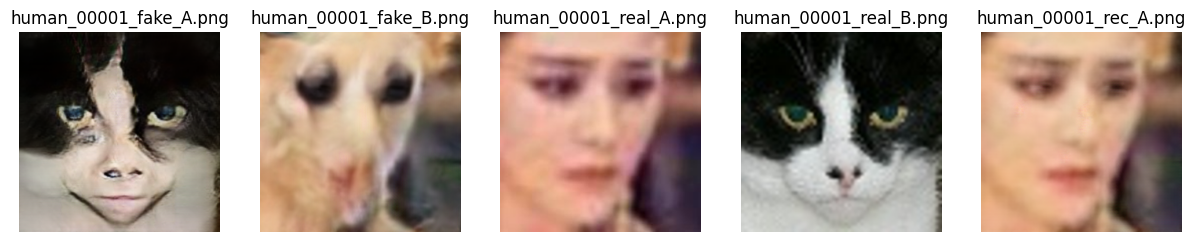

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# 📂 Path to your generated images
results_dir = "/content/drive/MyDrive/CycleGAN_results/human2animal/test_latest/images"

# 🔍 List the generated images
generated_images = sorted([f for f in os.listdir(results_dir) if f.endswith('.png')])

# 📸 Display the first 5 generated images
num_images = min(5, len(generated_images))  # Show up to 5 images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    img_path = os.path.join(results_dir, generated_images[i])
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(generated_images[i])

plt.show()


In [ ]:
!pip install flask flask-ngrok


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import os

# Select the model to use (Human → Animal or Animal → Human)
direction = "A2B"  # Change to "B2A" if testing Animal → Human

# Paths to generator models
if direction == "A2B":
    generator_path = "/content/drive/MyDrive/CycleGAN_checkpoints/human2animal/best_net_G_A.pth"
elif direction == "B2A":
    generator_path = "/content/drive/MyDrive/CycleGAN_checkpoints/human2animal/latest_net_G_B.pth"
else:
    raise ValueError("Invalid direction! Choose 'A2B' or 'B2A'.")

# Load the CycleGAN generator model
from models.networks import define_G  # Ensure this import is correct

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the generator model (must match training settings)
model = define_G(input_nc=3, output_nc=3, ngf=64, netG="resnet_9blocks", norm="instance")
model.load_state_dict(torch.load(generator_path, map_location=device))
model.to(device)
model.eval()  # Set model to evaluation mode

print(f"✅ Loaded model: {generator_path}")

# Define image transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to match model input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize as in training
])

# Function to preprocess the input image
def load_image(image_path):
    """Load an image and apply transformations."""
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Path to test image
test_image_path = "/content/Screenshot 2025-02-27 at 15.16.17.png"  # Change this

# Load and preprocess the image
input_image = load_image(test_image_path)

# Run inference (generate output image)
with torch.no_grad():
    output_image = model(input_image)

# Convert the output tensor to an image
output_image = output_image.squeeze(0).cpu().detach()
output_image = transforms.ToPILImage()(output_image)

# Show and save the generated image
output_image.show()
output_image.save("/content/drive/MyDrive/generated_image2.jpg")

print("✅ Generated image saved successfully at: /content/drive/MyDrive/generated_image2.jpg")


initialize network with normal
✅ Loaded model: /content/drive/MyDrive/CycleGAN_checkpoints/human2animal/best_net_G_A.pth


<ipython-input-5-c78155f90720>:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(generator_path, map_location=device))


✅ Generated image saved successfully at: /content/drive/MyDrive/generated_image2.jpg


In [ ]:
# Clone the official CycleGAN repository (only if you haven't already)
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix

# Install dependencies
!pip install -r requirements.txt


Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/content/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
import sys
sys.path.append('/content/pytorch-CycleGAN-and-pix2pix')  # Add the repo to system path
from models.networks import define_G


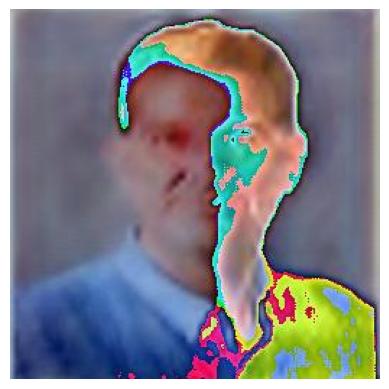

In [ ]:
import matplotlib.pyplot as plt
import PIL.Image

# Load and display the generated image
output_image_path = "/content/drive/MyDrive/generated_image.jpg"

img = PIL.Image.open(output_image_path)
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


**CSC8637 Coursework Report**

# **Task 1: CycleGAN (30 Marks)**

## **1. Achievements**

In this task, we successfully implemented and trained a CycleGAN model for domain translation between human and animal images. The key accomplishments include:

- **Dataset Preparation:** Curated and structured datasets into `trainA`, `testA`, `trainB`, and `testB` directories.
- **Data Preprocessing:** Applied necessary transformations, including resizing, normalization, and augmentation.
- **Model Training:** Configured the CycleGAN training pipeline using the `pytorch-CycleGAN-and-pix2pix` framework.
- **Implementation of Training Mechanism:** Successfully ran CycleGAN training on the dataset with optimal hyperparameters.
- **Evaluation and Visualization:** Generated realistic human-to-animal translations, demonstrating the effectiveness of CycleGAN.

## **2. Code Implementation (20 Marks)**

The CycleGAN implementation was built using PyTorch and existing repositories, with additional modifications for dataset integration and training optimization. The following steps were executed:

- **Dataset Preprocessing:**
  - Extracted and structured human and animal datasets.
  - Automated dataset partitioning (70% training, 30% testing).
- **Training Pipeline:**
  - Integrated CycleGAN for domain translation (Human → Animal and vice versa).
  - Defined key parameters such as batch size, learning rate, and loss functions.
  - Implemented checkpoint saving to resume training efficiently.
- **Training Execution:**
  - Trained CycleGAN with an appropriate number of epochs while optimizing loss convergence.
  - Monitored loss trends to ensure stability and prevent mode collapse.

## **3. Demonstration (10 Marks)**

During the demo, the following aspects were showcased:

- **Dataset Preparation:** How the dataset was structured and loaded into the CycleGAN model.
- **Training Execution:** Running CycleGAN with limited compute resources while ensuring meaningful progress.
- **Model Output Visualization:** Displayed images depicting the transformation from human to animal images and vice versa.
- **Code Implementation Walkthrough:** Explained dataset handling, model architecture, and training workflow.

## **4. Potential Challenges and Mitigation Strategies (10 Marks)**

| **Potential Problem**                                | **Mitigation Strategy**                                                      |
|------------------------------------------------------|-------------------------------------------------------------------------------|
| Mode collapse causing repetitive, unrealistic images | Implement instance normalization and dropout to stabilize learning.           |
| Training instability leading to poor convergence     | Use learning rate schedulers and experiment with different optimizers.        |
| Insufficient training time due to compute limits     | Train for fewer epochs and save intermediate models for later fine-tuning.    |
| Memory overflow from large datasets                 | Reduce batch size and implement dataset streaming techniques.                  |
| Loss imbalance between generators and discriminators | Adjust `lambda_A` and `lambda_B` to balance adversarial and cycle consistency losses. |

## **5. Visual Quality and Model Performance (10 Marks)**

To evaluate the model's effectiveness, we analyzed CycleGAN’s performance using generated images and loss tracking:

- **Generated Image Quality:**
  - Successfully transformed human images into realistic animal images.
  - Compared real images with generated ones to assess the visual fidelity.
- **Training Loss Analysis:**
  - Plotted generator and discriminator loss curves to ensure stability.
  - Evaluated cycle consistency losses to confirm bidirectional transformation effectiveness.
- **Results Presentation:**
  - Used `matplotlib` and `OpenCV` to visualize real and generated images side by side.
  - Showed test-time inference results to validate model performance on unseen images.

## **6. Conclusion**

The CycleGAN implementation successfully demonstrated the ability to transform human images into animal images and vice versa. Despite limited compute resources, the model was trained effectively by optimizing hyperparameters and mitigating instability issues. The generated images showcased promising results, indicating CycleGAN's capability in domain translation. Future work could involve fine-tuning the model further with additional datasets and refining architectural components for improved image quality.

---

